<img src="newlogomioti.png" style="height: 100px">   
<br />
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning 2 (Unsupervised learning)</center>

# Worksheet S4: Aprendizaje no supervisado: Clusterización

## Objetivos

El objetivo de este worksheet es que aprendas a utilizar técnicas de clusterización (identificación de grupos de observaciones, individuos, ...). 

## Configuración del entorno

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Clusterización

Hemos visto en los pasos anteriores que identificar grupos es una tarea que puede tener muchas aplicaciones. Desde un punto de vista formal, esta técnica se denomina `Clusterizar`, y clusterizar consiste en identificar estructuras ocultas en los datos. 

Sus aplicaciones son muy variadas:

* Identificar influencers en una red social
* Identificar mejores y peores clientes
* Identificar grupos de individuos, etc..

Hemos visto anteriormente algoritmos que hacen transformaciones que nos ayudan a la hora de encontrar estos grupos. Ahora vamos a ver algoritmos que directamente nos identifican estos grupos.

Para ello vamos a generar un dataset ficticio:

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs()

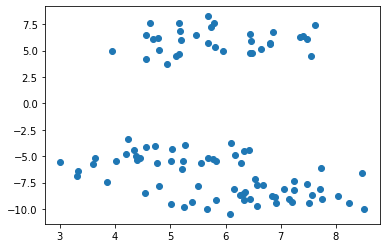

In [3]:
plt.scatter(X[:, 0], X[:, 1])

* ¿Qué podemos ver en el gráfico?
* ¿Necesitamos que cada punto esté separado en una categoria para hacer clusterización? ¿cuál es el input típico?

### Kmeans

El algoritmo más conocido en clusterización, y considerado de los 10 algoritmos más importantes en informática, es el algoritmo de las K-medias.

Su algoritmo en pseucódigo es el siguiente:

```
def k_medias(n_clusters, datos):

    hay_cambios = True
    
    while(hay_cambios):
        centroides = Identifica_centroides(clusters)
        clusters, hay_cambios = asigna_centroides(datos)
               
    return clusters
```

Donde las funciones:

* `identifica_centroides` Lo que hace es calcular por cluster actual, el centroide, que suele calcularse como un valor promediado de todos los elementos que lo componen.
* `asigna_centroides`: Por cada punto del dataset busca su centroide más cercano y asigna ese punto a ese cluster.

Vamos a ver su aplicación en `sklearn`:

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

En este caso, al ser un algoritmo de clusterización, aplicaremos directamente una función nueva que se llama `fit_predict`:

In [7]:
labels = kmeans.fit_predict(X)

El resultado es una variable que contiene, por cada elemento del dataset original, a que categoría pertenece:

In [8]:
labels

array([2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

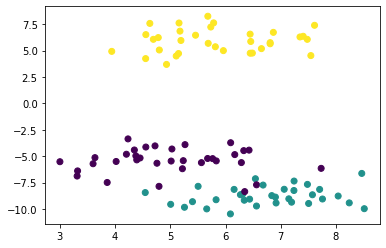

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Podemos acceder también a los centroides:

In [10]:
kmeans.cluster_centers_

array([[ 6.69856757, -8.63700975],
       [ 5.85300991,  5.92746682],
       [ 4.82359163, -5.14082512]])

Como vemos aspectos muy importantes en k-means son:

* Determinar corretamente el valor $k$
* Inicializar correctamente los clusters.

### ¿Cómo determinar $k$?

Como hemos visto este valor, está fijado por el usuario al inicio del algoritmo es inmutable. ¿Podríamos encontrar alguna manera para estimarlo a partir de los datos?.

La respuesta es sí, y el método más fácil de estimarlo, es mediante el método del codo. Este método lo que hace calcular `Kmeans` para distintos valores de $k$ y quedarse con aquel que minimice el error. En este caso usaremos de error la variable `inertia_` que nos mide de alguna manera el desajuste entre los datos y los clusters:

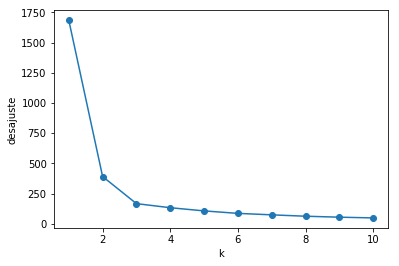

In [9]:
desajuste = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    desajuste.append(km.inertia_)

plt.plot(range(1, 11), desajuste, marker='o')
plt.xlabel('k')
plt.ylabel('desajuste')
plt.show()

Como podemos ver existe un descenso muy notable hasta obtener el valor $k$ y a partir de ahí el desajuste crece mucho más reducidamente. ¿Qué valor de $k$ seleccionar?. Para responder esta variable generalmente deberemos aplicar información del dominio del problema e identificar los datos.

Como vemos, los algoritmos de clustering realizan asunciones sobre los datos a la hora de identificar grupos en los mismos.

Como k-means está basado en distancias, generalmente geométricas, el modelo subyacente de los datos que identificará son grupos con la misma varianza y generalmente esféricos.

Veamos distintos ejemplos de datos y como se comporta `k-means` en los mismos:

Text(0.5,1,'Distinto tamaño')

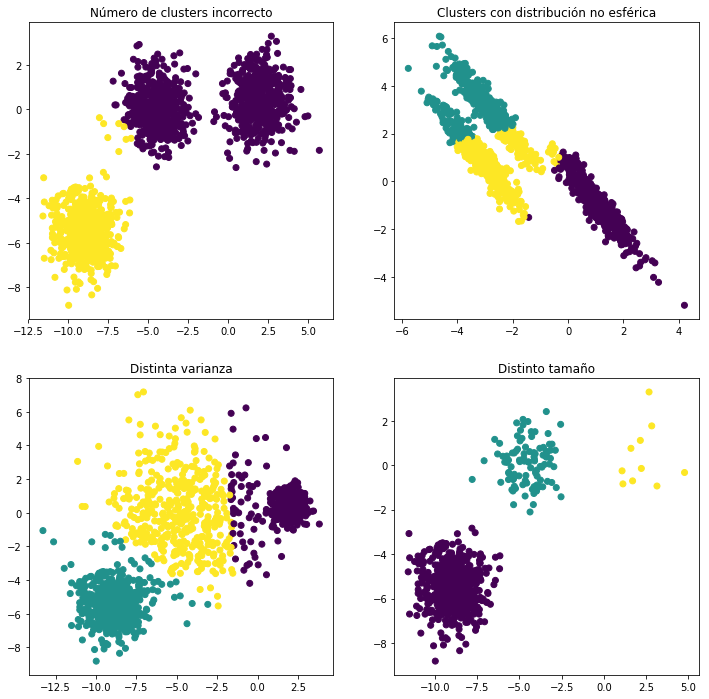

In [10]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Número de clusters incorrecto
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Número de clusters incorrecto")

# Datos distribuidos de forma anisotrópica
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Clusters con distribución no esférica")

# Distinta varianza
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Distinta varianza")

# Clusters de distinto tamaño
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Distinto tamaño")

Como podemos ver los resultados son cuanto menos dispares. 

Podemos ver en la siguiente tabla resumen los principales algoritmos de clustering disponibles en `sklearn` y sus resultados sobre distintos datasets. (http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

<img src="plot_cluster_comparison.png" width="90%">

* ¿Qué opinas de los resultados obtenidos?
* ¿Cuál es para ti el mejor algoritmo de clusterización?